In [2]:
import glob 
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cf
import intake
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import easygems.healpix as egh
import os

savedir = '/home/users/train045/Documents/WCRP25_hackathon/figs/D4/'

/home/users/train045/miniforge3/envs/wcrp_hackathon/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


### estimate percentiles

In [32]:
ddir = '/work/scratch-nopw2/train045/percentiles-aug_feb/ral3_zoom10/'
files = sorted(glob.glob(ddir + '*'))
files

['/work/scratch-nopw2/train045/percentiles-aug_feb/ral3_zoom10/bins.npy',
 '/work/scratch-nopw2/train045/percentiles-aug_feb/ral3_zoom10/hist_time_0.npy',
 '/work/scratch-nopw2/train045/percentiles-aug_feb/ral3_zoom10/hist_time_1.npy',
 '/work/scratch-nopw2/train045/percentiles-aug_feb/ral3_zoom10/hist_time_10.npy',
 '/work/scratch-nopw2/train045/percentiles-aug_feb/ral3_zoom10/hist_time_11.npy',
 '/work/scratch-nopw2/train045/percentiles-aug_feb/ral3_zoom10/hist_time_12.npy',
 '/work/scratch-nopw2/train045/percentiles-aug_feb/ral3_zoom10/hist_time_13.npy',
 '/work/scratch-nopw2/train045/percentiles-aug_feb/ral3_zoom10/hist_time_14.npy',
 '/work/scratch-nopw2/train045/percentiles-aug_feb/ral3_zoom10/hist_time_15.npy',
 '/work/scratch-nopw2/train045/percentiles-aug_feb/ral3_zoom10/hist_time_16.npy',
 '/work/scratch-nopw2/train045/percentiles-aug_feb/ral3_zoom10/hist_time_17.npy',
 '/work/scratch-nopw2/train045/percentiles-aug_feb/ral3_zoom10/hist_time_18.npy',
 '/work/scratch-nopw2/trai

In [33]:
li = []
for f in glob.glob(ddir + 'hist*'):
    li.append(np.load(f))
hist = sum(li)
bins = np.load(glob.glob(ddir + 'bins*')[0])

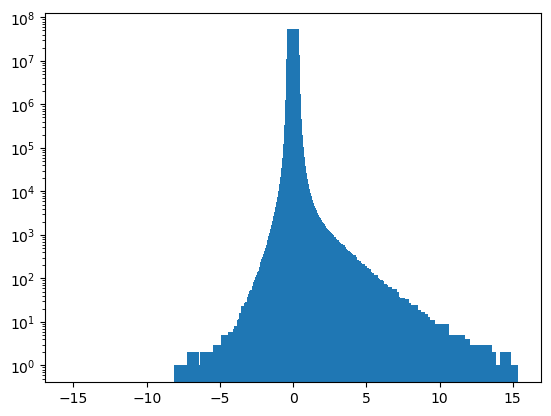

In [38]:
plt.bar(bins[:-1], hist)
plt.yscale('log')

In [69]:
# cumulative count to find 99th percentile

# compute cumulative histogram as proportion of total data points
total_obs = np.sum(hist)
proportional_hist = hist / total_obs
cumulative_proportion = np.cumsum(proportional_hist)

# first instance of exceeding .99 percentile in histogram
idx = np.abs(cumulative_proportion - .99).argmin()

# corresponding value
val = bins[idx]
print('approximated 99th percentile is:', val)

approximated 99th percentile is: 0.21600000000000108


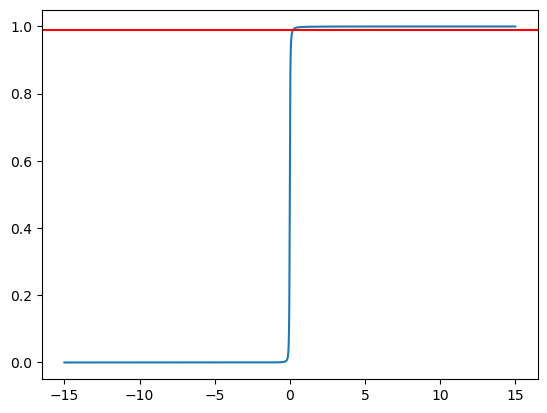

In [68]:
plt.plot(bins[:-1], cumulative_proportion)
plt.axhline(.99, c='r')

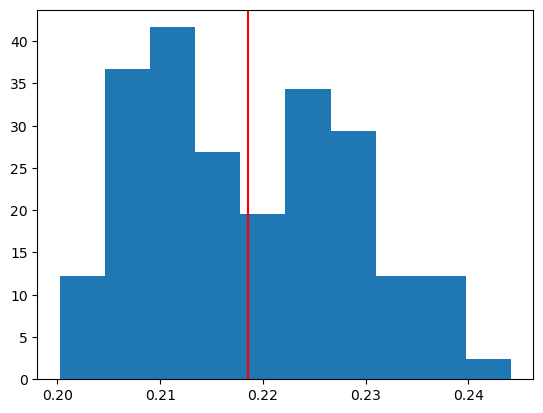

In [76]:
# estimate from independant tstep percentiles
li = []
for f in glob.glob(ddir + 'pi*'):
    p = np.load(f)
    li.append(p)
plt.hist(li, bins=10, )
plt.axvline(np.mean(li), c='r')